EDA ON WINE QUALITY DATASET

Dataset Information
Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Instances - 4898            
Features  - 11

Has Missing Values?
No

Additional Variable Information
Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

In [84]:
import pandas as pd
df = pd.read_csv('winequality-red.csv',delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
# Summary of the dataframe
df.info()  # data is clean(no missing values) also called non-sparsed dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
# discriptive summary of the dataframe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [85]:
# how many types of wine are there according to the quality of the wine
df['quality'].unique()    # 6 category of wines with one with higest quality of 8

array([5, 6, 7, 4, 8, 3])

In [71]:
# To check if theres duplicate data
df[df.duplicated()].value_counts().sum()      # total of 240 rows with duplicate values

np.int64(240)

In [83]:
# Removing the duplicate data permanently from the dataset
df.drop_duplicates(inplace=True)
print(df.shape)
df

(3462, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3457,7.575031,0.363927,0.390364,2.857215,0.067787,15.000000,33.286073,0.996102,3.294291,0.813576,12.103639,8
3458,7.805055,0.368896,0.355931,1.743218,0.064025,4.296547,12.567818,0.995637,3.281862,0.922805,10.734710,8
3459,7.591437,0.355164,0.346776,1.727960,0.062957,3.838795,12.720402,0.995765,3.263552,0.985365,10.475317,8
3460,5.531425,0.410338,0.256909,2.000000,0.059034,18.033772,44.927304,0.992430,3.601637,0.744831,13.347796,8


<Axes: >

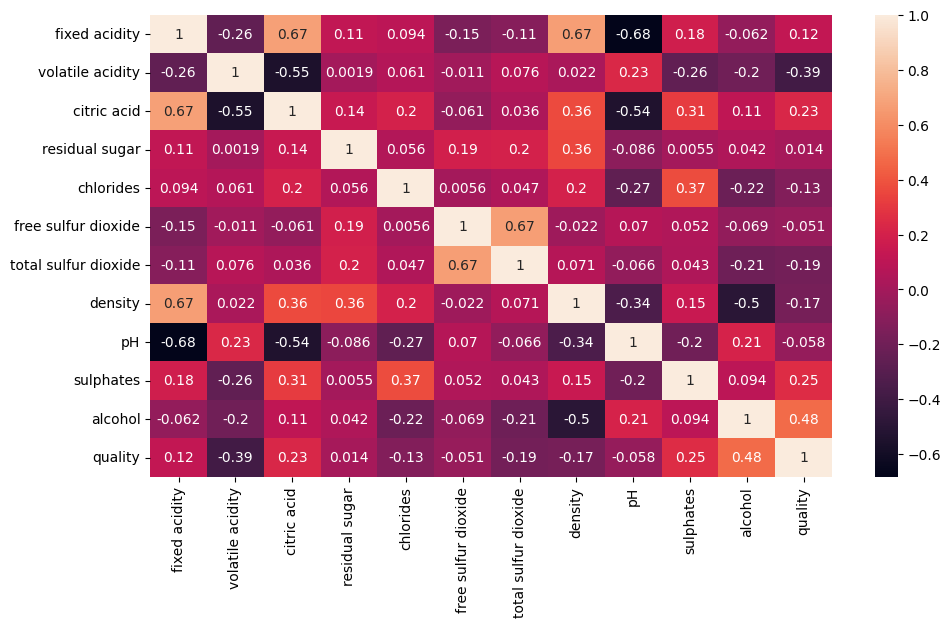

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[11,6])
sns.heatmap(df.corr(),annot=True)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


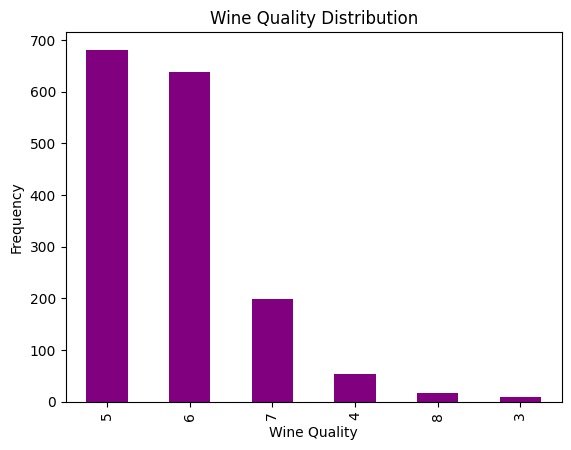

In [87]:
#Dataset is imbalanced. confirming using the visualisation.
print(df['quality'].value_counts())
df['quality'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Wine Quality Distribution')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Quality vs Count')

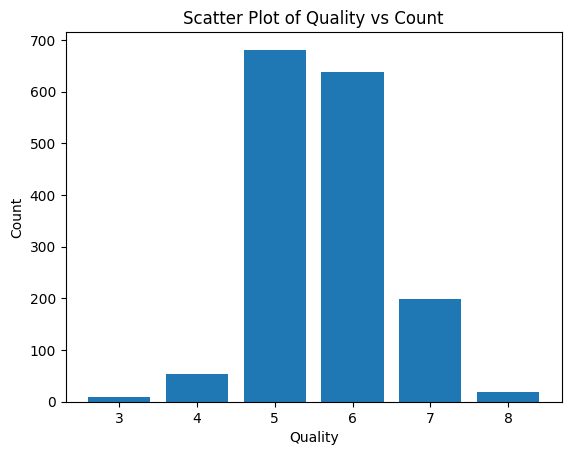

In [88]:
quality_counts = df['quality'].value_counts().sort_index()  # Ensure sorted order
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Scatter Plot of Quality vs Count")

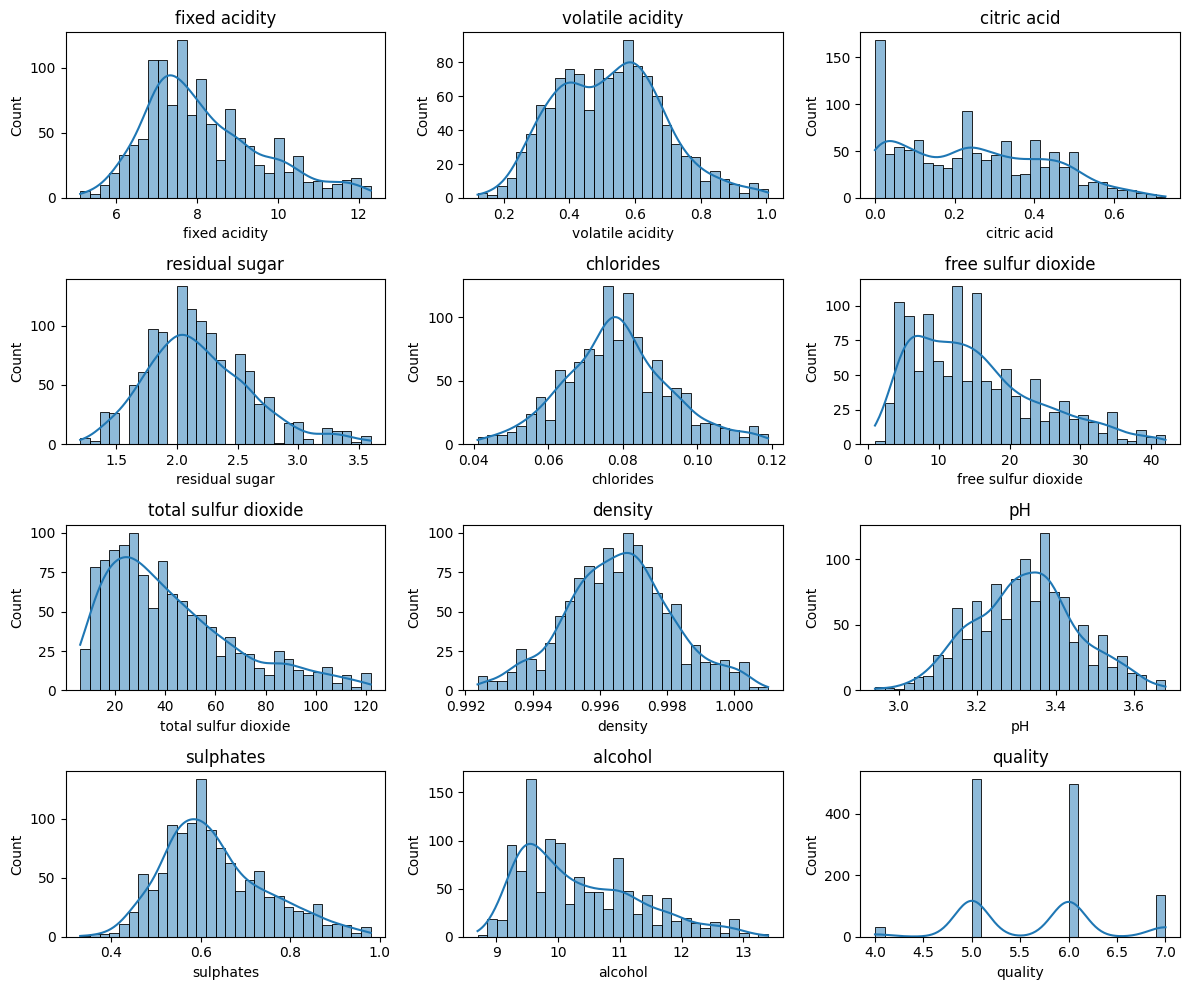

In [92]:
# to visualise each distribution of the dataset
plt.figure(figsize=(12,10))
for i,column in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.histplot(df[column],kde=True, bins=30)
    plt.title(column)
plt.tight_layout()

In [ ]:
# using SMOTE to oversample the minority datapoints
from imblearn.over_sampling import SMOTE

X = df.drop("quality", axis=1)  # Features
y = df["quality"]  # Target variable

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# concatenating the data
df_upsampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['quality'])], axis=1)

# Print dataset size before & after
print("Original dataset shape:", df.shape)
print("Balanced dataset shape:", df_upsampled.shape)

df = df_upsampled.copy()         # Update the original dataframe with the upsampled data

In [90]:
# Removing outliers in the dataset
def remove_outliers(df):
    Q1 = df.quantile(0.25)      # 25% quartile for each feature
    Q3 = df.quantile(0.75)      # 75% quartile for each feature
    IQR = Q3 - Q1               # Interquartile range for each feature

    # Range within which datapoints must lie, exceeding the range is termed as an outlier
    lower_fence = Q1 - 1.5 * (IQR)
    upper_fence = Q3 + 1.5 * (IQR)

    return df[~((df < lower_fence) | (df > upper_fence)).any(axis=1)]

# Calling the function
df_cleaned = remove_outliers(df)
print(f"Original shape : {df.shape}")
print(f"After removing outliers : {df_cleaned.shape}")
df = df_cleaned.copy()

Original shape : (1599, 12)
After removing outliers : (1179, 12)


<Axes: xlabel='alcohol', ylabel='pH'>

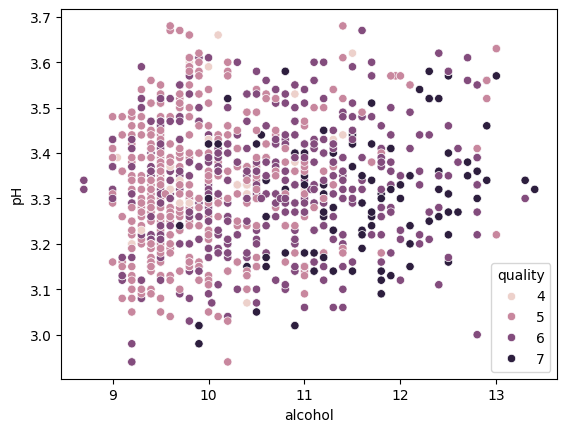

In [91]:
sns.scatterplot(x='alcohol', y='pH', hue='quality', data=df)

In [ ]:
# checking for missing values in the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [94]:
# Saving the processed data into a new file
df.to_csv('half_Cleaned_red_wine_data.csv', index=False)